In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import ttest

In [43]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)

In [44]:
data = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/out/pmid_data.csv')

# Data Visualization

In [45]:
relevance_data = data[data['search_type'] == 'relevance']
pubdate_desc_data = data[data['search_type'] == 'pubdate_desc']

In [46]:
citations_relevance = relevance_data[['query', 'search_type', 'page', 'citation_count']]

In [47]:
#Scatter plot of x vs. y in number of citations with Page 1 on one axis and Page 2 on y axis

citations_page1 = citations_relevance[citations_relevance['page'] == 1]['citation_count'].tolist()
citations_page2 = citations_relevance[citations_relevance['page'] == 2]['citation_count'].tolist()


Because RCR works only for papers published earlier than 2021, it will not be possible to compare RCR between relevance and publication date. Will see if average RCR is different between first and second page

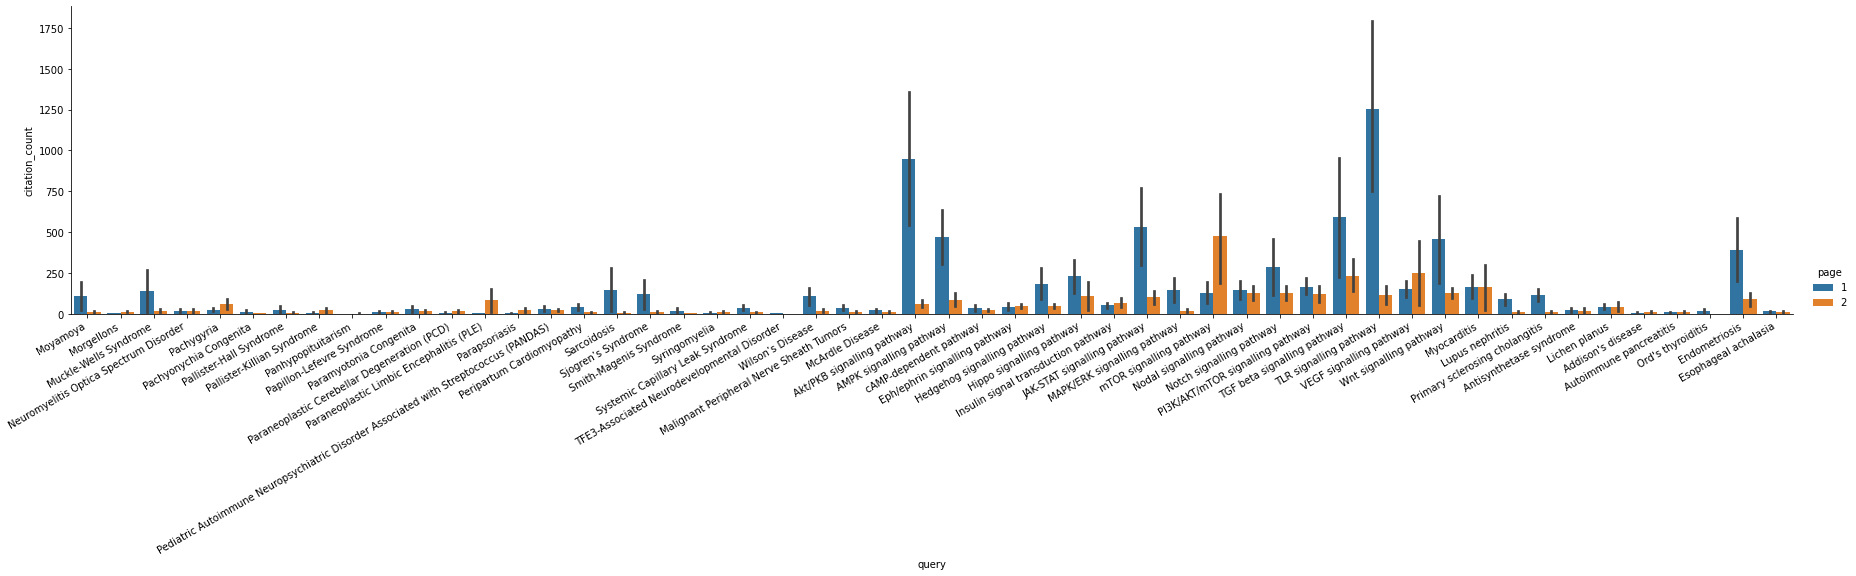

In [48]:
#First 1000 rows for citations

g = sns.catplot(data = relevance_data.iloc[:1000,:], kind='bar', hue='page', x='query', y='citation_count', ci=68, aspect=5)
g.set_xticklabels(rotation=30, ha='right')

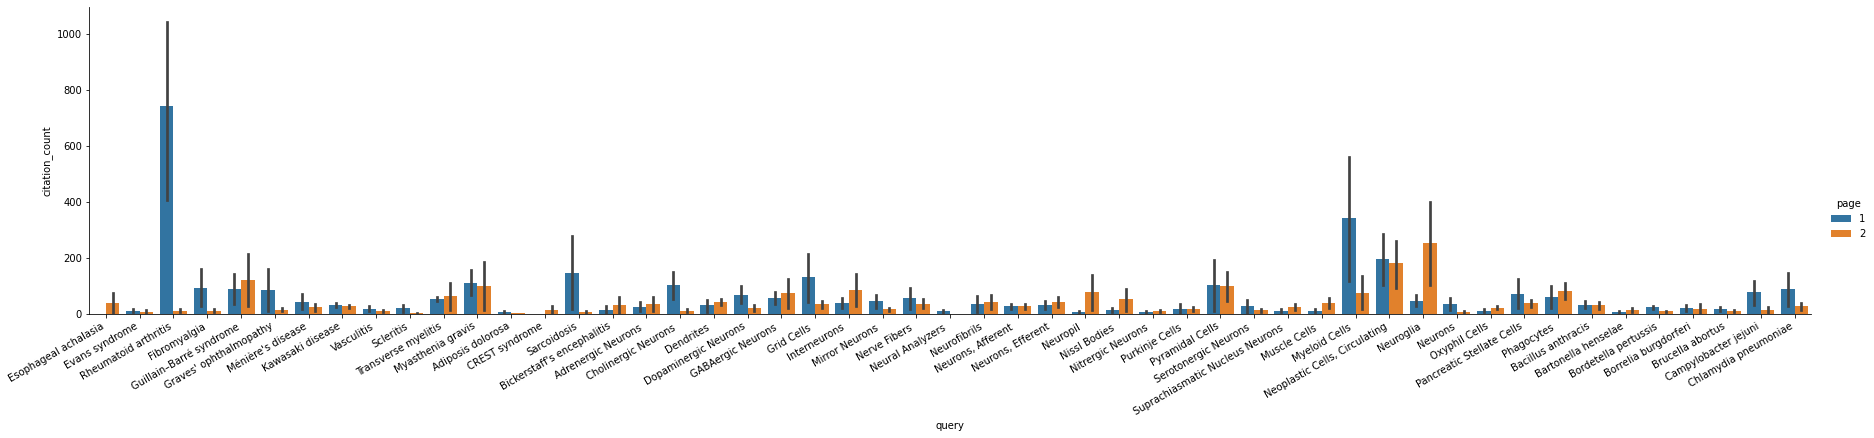

In [49]:
#First 1000 rows for citations

g = sns.catplot(data = relevance_data.iloc[1000:2000,:], kind='bar', hue='page', x='query', y='citation_count', ci=68, aspect=5)
g.set_xticklabels(rotation=30, ha='right')

# APT Score

In [50]:
biomedical_triangle = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/apt.csv')

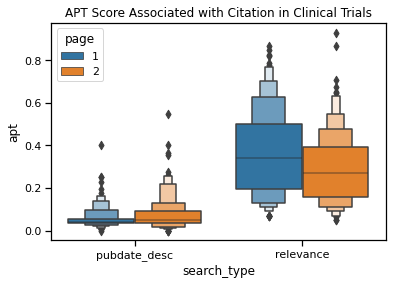

In [206]:
g = sns.boxenplot(data=biomedical_triangle, x='search_type', y='apt', hue='page').set_title('APT Score Associated with Citation in Clinical Trials')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/apt_score.png', dpi=300, bbox_inches='tight')


In [11]:
x = biomedical_triangle[biomedical_triangle['search_type'] == 'pubdate_desc']
y = biomedical_triangle[biomedical_triangle['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['apt'].tolist()
b = y[y['page'] == 1]['apt'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-19.538473,360,two-sided,1.796754e-58,"[-0.33, -0.27]",2.053839,5.914e+54,1.0


In [12]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['apt'].tolist()
b = y[y['page'] == 2]['apt'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.452155,343.620726,two-sided,0.000626,"[0.03, 0.11]",0.363458,33.455,0.930401


# Journal Country of Origin

In [208]:
country_of_origin_journal = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/country_journal.csv')

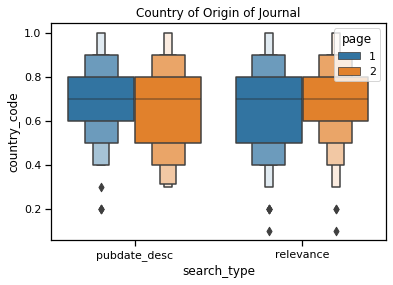

In [209]:
sns.boxenplot(data=country_of_origin_journal, x='search_type', y='country_code', hue='page').set_title('Country of Origin of Journal')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/journal_country_of_origin.png', dpi=300, bbox_inches='tight')


In [15]:
country_of_origin_journal

,query,search_type,page,country_code
0,AMPK signalling pathway,pubdate_desc,1,0.7
1,AMPK signalling pathway,pubdate_desc,2,0.9
2,AMPK signalling pathway,relevance,1,1.0
...,...,...,...,...
717,structural racism,pubdate_desc,2,0.7
718,structural racism,relevance,1,0.9
719,structural racism,relevance,2,0.9


In [16]:
x = country_of_origin_journal[country_of_origin_journal['search_type'] == 'pubdate_desc']
y = country_of_origin_journal[country_of_origin_journal['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['country_code'].tolist()
b = y[y['page'] == 1]['country_code'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.114235,360,two-sided,0.909115,"[-0.04, 0.04]",0.012008,0.117,0.051488


In [17]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['country_code'].tolist()
b = y[y['page'] == 2]['country_code'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.039039,356.20408,two-sided,0.968881,"[-0.04, 0.04]",0.004113,0.117,0.050174


# Is English Only

In [210]:
is_english_only = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/is_english_only.csv')
is_english_only

,query,search_type,page,is_english_only
0,AMPK signalling pathway,pubdate_desc,1,1.0
1,AMPK signalling pathway,pubdate_desc,2,1.0
2,AMPK signalling pathway,relevance,1,1.0
3,AMPK signalling pathway,relevance,2,1.0
4,Acalabrutinib,pubdate_desc,1,1.0
...,...,...,...,...
715,public transportation,relevance,2,1.0
716,structural racism,pubdate_desc,1,1.0
717,structural racism,pubdate_desc,2,1.0
718,structural racism,relevance,1,1.0


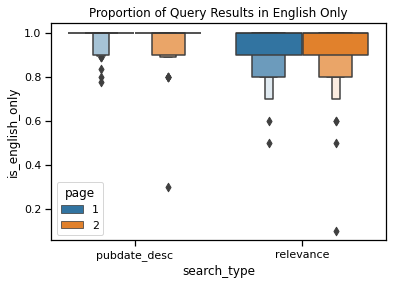

In [211]:
sns.boxenplot(data=is_english_only, x='search_type', y='is_english_only', hue='page').set_title('Proportion of Query Results in English Only')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/is_english_only.png', dpi=300, bbox_inches='tight')


In [20]:
x = is_english_only[is_english_only['search_type'] == 'pubdate_desc']
y = is_english_only[is_english_only['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['is_english_only'].tolist()
b = y[y['page'] == 1]['is_english_only'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.703265,360,two-sided,7.890295e-11,"[0.04, 0.06]",0.704632,9.986e+07,1.0


In [21]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['is_english_only'].tolist()
b = y[y['page'] == 2]['is_english_only'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.332212,338.819424,two-sided,0.183686,"[-0.01, 0.04]",0.140607,0.273,0.264965


# Human, Animal, and Molecular/Cellular

In [22]:
human_mol_cell = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/human_animal_molcellular.csv')
human_mol_cell

,query,search_type,page,human,animal,molecular_cellular
0,AMPK signalling pathway,pubdate_desc,1,0.117,0.215,0.668
1,AMPK signalling pathway,pubdate_desc,2,0.211,0.067,0.522
2,AMPK signalling pathway,relevance,1,0.196,0.241,0.564
...,...,...,...,...,...,...
717,structural racism,pubdate_desc,2,1.000,0.000,0.000
718,structural racism,relevance,1,0.875,0.025,0.100
719,structural racism,relevance,2,0.925,0.000,0.075


In [23]:
human_mol_cell_melt = human_mol_cell.melt(id_vars=['query', 'search_type', 'page'])

In [24]:
human_mol_cell_melt

,query,search_type,page,variable,value
0,AMPK signalling pathway,pubdate_desc,1,human,0.117
1,AMPK signalling pathway,pubdate_desc,2,human,0.211
2,AMPK signalling pathway,relevance,1,human,0.196
...,...,...,...,...,...
2157,structural racism,pubdate_desc,2,molecular_cellular,0.000
2158,structural racism,relevance,1,molecular_cellular,0.100
2159,structural racism,relevance,2,molecular_cellular,0.075


In [212]:
readability_abstract = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/readability_fk_score_abstract.csv')
readability_abstract


,query,search_type,page,fkscore_abstract
0,AMPK signalling pathway,pubdate_desc,1,18.0830
1,AMPK signalling pathway,pubdate_desc,2,23.7780
2,AMPK signalling pathway,relevance,1,15.4270
3,AMPK signalling pathway,relevance,2,9.9555
4,Acalabrutinib,pubdate_desc,1,21.0635
...,...,...,...,...
715,public transportation,relevance,2,28.0290
716,structural racism,pubdate_desc,1,14.9510
717,structural racism,pubdate_desc,2,26.9150
718,structural racism,relevance,1,13.1130


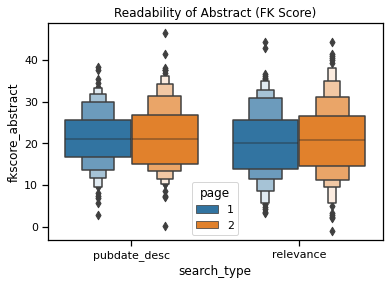

In [213]:
sns.boxenplot(data=readability_abstract, x='search_type', y='fkscore_abstract', hue='page').set_title('Readability of Abstract (FK Score)')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/readability_abstract.png', dpi=300, bbox_inches='tight')


In [29]:
readability_abstract

,query,search_type,page,fkscore_abstract
0,AMPK signalling pathway,pubdate_desc,1,18.218900
1,AMPK signalling pathway,pubdate_desc,2,25.255778
2,AMPK signalling pathway,relevance,1,16.137900
...,...,...,...,...
717,structural racism,pubdate_desc,2,20.426333
718,structural racism,relevance,1,13.019111
719,structural racism,relevance,2,22.852750


In [30]:
x = readability_abstract[readability_abstract['search_type'] == 'pubdate_desc']
y = readability_abstract[readability_abstract['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['fkscore_abstract'].tolist()
b = y[y['page'] == 1]['fkscore_abstract'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.121542,360,two-sided,0.034559,"[0.11, 2.96]",0.223012,1.003,0.561973


In [31]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['fkscore_abstract'].tolist()
b = y[y['page'] == 2]['fkscore_abstract'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.764543,353.812351,two-sided,0.445053,"[-2.33, 1.03]",0.080635,0.154,0.118878


In [214]:
readability_title = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/readability_fk_score_title.csv')
readability_title


,query,search_type,page,fkscore_title
0,AMPK signalling pathway,pubdate_desc,1,-11.7835
1,AMPK signalling pathway,pubdate_desc,2,-22.1085
2,AMPK signalling pathway,relevance,1,28.1525
3,AMPK signalling pathway,relevance,2,10.3940
4,Acalabrutinib,pubdate_desc,1,-2.9080
...,...,...,...,...
715,public transportation,relevance,2,19.0875
716,structural racism,pubdate_desc,1,-4.9400
717,structural racism,pubdate_desc,2,11.5150
718,structural racism,relevance,1,27.9925


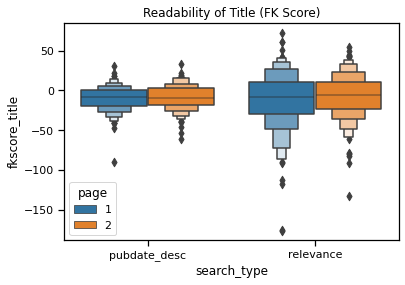

In [215]:
sns.boxenplot(data=readability_title, x='search_type', y='fkscore_title', hue='page').set_title('Readability of Title (FK Score)')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/readability_title.png', dpi=300, bbox_inches='tight')


In [33]:
x = readability_title[readability_title['search_type'] == 'pubdate_desc']
y = readability_title[readability_title['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['fkscore_title'].tolist()
b = y[y['page'] == 1]['fkscore_title'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.383116,360,two-sided,0.167487,"[-1.65, 9.48]",0.14539,0.291,0.281196


In [34]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['fkscore_title'].tolist()
b = y[y['page'] == 2]['fkscore_title'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.87966,351.849225,two-sided,0.379644,"[-9.83, 3.75]",0.092652,0.169,0.141604


In [37]:
pd.set_option('display.max_columns', 500)

In [2]:
race = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/RaceEthGender.csv')

,pmid,query,search_type,page,LastAuthFirstName,LastAuthLastName,FirstAuthLastName,FirstAuthFirstName,gender_last_author,p_last_author_female,...,firstauthor_percent_asian,firstauthor_percent_american_indian_alaskan_native,firstauthor_percent_multi_race,firstauthor_percent_hispanic,lastauthor_percent_white,lastauthor_percent_black,lastauthor_percent_asian,lastauthor_percent_american_indian_alaskan_native,lastauthor_percent_multi_race,lastauthor_percent_hispanic
0,19297575,Moyamoya,relevance,1,Edward,Smith,Scott,Michael,male,0.01,...,0.41,1.15,1.9,1.68,73.35,22.22,0.4,0.85,1.63,1.56
1,29911252,Moyamoya,relevance,1,Ran,Meng,Shang,Shuling,male,0.42,...,88.49,0,1.39,0.83,45.27,0.31,45.37,0.36,1.62,7.06
2,27960175,Moyamoya,relevance,1,Jong,Kim,Fujimura,Miki,male,0.06,...,84.08,0,8.92,(S),2.6,0.36,94.52,0.03,1.99,0.5
3,27549666,Moyamoya,relevance,1,Isao,Date,Hishikawa,Tomohito,male,0.01,...,NaN,NaN,NaN,NaN,47.44,11.54,33.97,(S),4.97,(S)
4,28381201,Moyamoya,relevance,1,Mingli,Rao,Huang,Shuo,male,0.48,...,96.83,0.02,1.74,0.29,23.01,0.51,72.22,0.18,3.31,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7201,33988094,literacy skills,pubdate_desc,2,Maryam,Khosravi,Khorramrouz,Fatemeh,female,0.98,...,NaN,NaN,NaN,NaN,78.8,(S),3.18,(S),13.78,3.53
7202,35608744,literacy skills,pubdate_desc,2,David,Francis,Miciak,Jeremy,male,0.01,...,NaN,NaN,NaN,NaN,63.89,27.57,1.3,2.08,2.44,2.72
7203,35603494,literacy skills,pubdate_desc,2,Brian,Coakley,Kellner,Rebecca,male,0.01,...,0.88,0.14,0.99,1.38,78.9,17.68,0.48,0.29,1.39,1.26
7204,35597972,literacy skills,pubdate_desc,2,Ambar,Kulshreshtha,Cornely,Ronald,female,0.84,...,(S),(S),(S),(S),NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
gender = race[['query', 'search_type', 'page','p_last_author_female', 'p_first_author_female']]

In [217]:
gender_long = gender.melt(id_vars=['query', 'search_type','page'], var_name='Author Position', value_name='Percent Female')

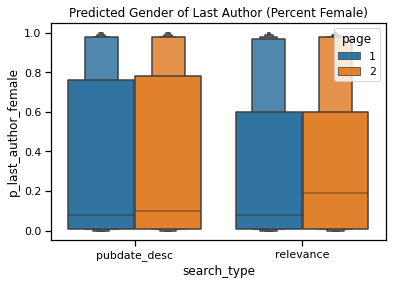

In [219]:
# Initialize a grid of plots with an Axes for each walk
sns.boxenplot(data=gender, x='search_type', y='p_last_author_female', 
                        hue='page', order=['pubdate_desc', 'relevance']).set_title('Predicted Gender of Last Author (Percent Female)')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/last_author_gender.png', dpi=300, bbox_inches='tight')

In [33]:
x = gender[gender['search_type'] == 'pubdate_desc']
y = gender[gender['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['p_last_author_female'].tolist()
b = y[y['page'] == 1]['p_last_author_female'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.445779,3366.539047,two-sided,0.000576,"[0.02, 0.07]",0.118269,14.111,0.93144


In [34]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['p_last_author_female'].tolist()
b = y[y['page'] == 2]['p_last_author_female'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.62725,3422.974332,two-sided,0.103776,"[-0.05, 0.0]",0.05561,0.144,0.369665


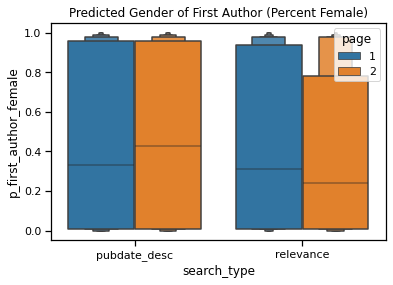

In [220]:
sns.boxenplot(data=gender, x='search_type', y='p_first_author_female', dodge=True,
                        hue='page', order=['pubdate_desc', 'relevance']).set_title('Predicted Gender of First Author (Percent Female)')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/first_author_gender.png', dpi=300, bbox_inches='tight')

In [35]:
x = gender[gender['search_type'] == 'pubdate_desc']
y = gender[gender['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['p_first_author_female'].tolist()
b = y[y['page'] == 1]['p_first_author_female'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.20359,3190.50477,two-sided,0.027624,"[0.0, 0.06]",0.077912,0.445,0.59635


In [36]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['p_first_author_female'].tolist()
b = y[y['page'] == 2]['p_first_author_female'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.660884,3246,two-sided,0.007832,"[0.01, 0.06]",0.093379,1.335,0.75808


In [113]:
ref_diversity = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/reference_diversity.csv')

In [114]:
ref_diversity

,Unnamed: 0,query,search_type,page,reference_diversity
0,0,AMPK signalling pathway,pubdate_desc,1,0.000689
1,1,AMPK signalling pathway,pubdate_desc,2,0.001389
2,2,AMPK signalling pathway,relevance,1,0.028141
...,...,...,...,...,...
677,703,structural racism,pubdate_desc,2,0.002149
678,704,structural racism,relevance,1,0.017225
679,705,structural racism,relevance,2,0.011483


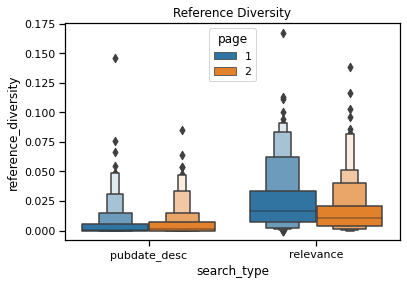

In [221]:
sns.set_context('notebook')
g = sns.boxenplot(data=ref_diversity, x='search_type', y='reference_diversity', dodge=True,
                        hue='page', order=['pubdate_desc', 'relevance']).set_title('Reference Diversity')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/reference_diversity.png', dpi=300, bbox_inches='tight')


In [181]:
x = ref_diversity[ref_diversity['search_type'] == 'pubdate_desc']
y = ref_diversity[ref_diversity['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['reference_diversity'].tolist()
b = y[y['page'] == 1]['reference_diversity'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.816891,297.849399,two-sided,9.402608e-14,"[-0.02, -0.01]",0.825208,9.147e+10,1.0


In [182]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['reference_diversity'].tolist()
b = y[y['page'] == 2]['reference_diversity'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.952936,344.70834,two-sided,0.003364,"[0.0, 0.01]",0.311804,7.448,0.836909


In [126]:
rcr = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/RCR.csv')

In [129]:
rcr = rcr.dropna()

In [130]:
rcr

,query,search_type,page,relative_citation_ratio
2,AMPK signalling pathway,relevance,1,16.530
3,AMPK signalling pathway,relevance,2,3.325
6,Acalabrutinib,relevance,1,12.820
...,...,...,...,...
716,structural racism,pubdate_desc,1,0.520
718,structural racism,relevance,1,19.260
719,structural racism,relevance,2,3.700


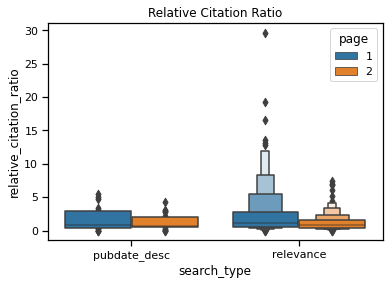

In [222]:
sns.set_context('notebook')
g = sns.boxenplot(data=rcr, x='search_type', y='relative_citation_ratio', dodge=True,
                        hue='page', order=['pubdate_desc', 'relevance']).set_title('Relative Citation Ratio')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/relative_citation_ratio.png', dpi=300, bbox_inches='tight')


In [183]:
x = rcr[rcr['search_type'] == 'pubdate_desc']
y = rcr[rcr['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['relative_citation_ratio'].tolist()
b = y[y['page'] == 1]['relative_citation_ratio'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.671405,32.815141,two-sided,0.104153,"[-1.92, 0.19]",0.240386,0.825,0.162293


In [184]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['relative_citation_ratio'].tolist()
b = y[y['page'] == 2]['relative_citation_ratio'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.47966,222.385894,two-sided,0.000012,"[0.74, 1.89]",0.470135,1472.087,0.993578


In [165]:
author_count = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/author_count.csv')


In [170]:
author_count

,query,search_type,page,author_count
0,AMPK signalling pathway,pubdate_desc,1,7.0
1,AMPK signalling pathway,pubdate_desc,2,5.5
2,AMPK signalling pathway,relevance,1,2.5
...,...,...,...,...
717,structural racism,pubdate_desc,2,4.0
718,structural racism,relevance,1,5.0
719,structural racism,relevance,2,2.0


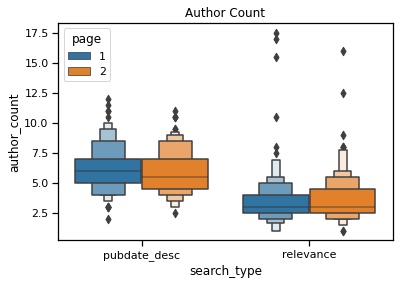

In [223]:
sns.set_context('notebook')
g = sns.boxenplot(data=author_count, x='search_type', y='author_count', dodge=True,
                        hue='page', order=['pubdate_desc', 'relevance']).set_title('Author Count')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/author_count.png', dpi=300, bbox_inches='tight')


In [185]:
x = author_count[author_count['search_type'] == 'pubdate_desc']
y = author_count[author_count['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['author_count'].tolist()
b = y[y['page'] == 1]['author_count'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.059445,360,two-sided,3.558546e-32,"[2.36, 3.2]",1.372778,6.324e+28,1.0


In [186]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['author_count'].tolist()
b = y[y['page'] == 2]['author_count'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.696155,349.835926,two-sided,0.486794,"[-0.58, 0.27]",0.073315,0.147,0.106683


In [177]:
affiliation_count = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/affiliation_count.csv')


In [178]:
affiliation_count

,query,search_type,page,affiliation_count
0,AMPK signalling pathway,pubdate_desc,1,9.0
1,AMPK signalling pathway,pubdate_desc,2,5.5
2,AMPK signalling pathway,relevance,1,2.5
...,...,...,...,...
717,structural racism,pubdate_desc,2,4.0
718,structural racism,relevance,1,5.0
719,structural racism,relevance,2,2.0


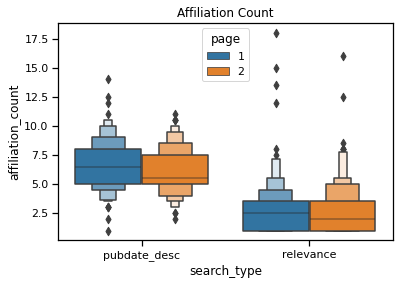

In [224]:
sns.set_context('notebook')
g = sns.boxenplot(data=affiliation_count, x='search_type', y='affiliation_count', dodge=True,
                        hue='page', order=['pubdate_desc', 'relevance']).set_title('Affiliation Count')
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/affiliation_count.png', dpi=300, bbox_inches='tight')


In [187]:
x = affiliation_count[affiliation_count['search_type'] == 'pubdate_desc']
y = affiliation_count[affiliation_count['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['page'] == 1]['affiliation_count'].tolist()
b = y[y['page'] == 1]['affiliation_count'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.840302,360,two-sided,2.970949e-43,"[3.22, 4.14]",1.665096,5.24e+39,1.0


In [188]:
#Comparing Page 1 Best Match vs. Page 2 Best Match
a = y[y['page'] == 1]['affiliation_count'].tolist()
b = y[y['page'] == 2]['affiliation_count'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.195853,356.622981,two-sided,0.232548,"[-0.18, 0.76]",0.126005,0.232,0.222112


In [229]:
funding_and_covid_data = pd.read_csv('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/features/funding_and_covid_data.tsv', sep='\t')


In [231]:
funding_and_covid_data.dropna()

,pmid,publication_types,grant_id,grant_acronym,grant_country,grant_agency,us_gov_funding,other_funding,covid
12,10376745,D016428:Journal Article; D013486:Research Supp...,NS07309,NS,United States,NINDS NIH HHS,True,False,False
13,10407422,D016428:Journal Article; D013485:Research Supp...,E.0733,TI_,Italy,Telethon,False,True,False
14,10449358,D016428:Journal Article; D013485:Research Supp...,R01 CA047207,CA,United States,NCI NIH HHS,True,True,False
17,10515301,D016428:Journal Article; D013487:Research Supp...,AA09346,AA,United States,NIAAA NIH HHS,True,False,False
19,10530691,D016428:Journal Article; D013487:Research Supp...,P50 NS16308,NS,United States,NINDS NIH HHS,True,False,False
...,...,...,...,...,...,...,...,...,...
6756,9673173,D016428:Journal Article; D013487:Research Supp...,DE10563,DE,United States,NIDCR NIH HHS,True,False,False
6760,9709046,D016428:Journal Article; D013485:Research Supp...,DA09656,DA,United States,NIDA NIH HHS,True,True,False
6770,9839659,D003160:Comparative Study; D016428:Journal Art...,T35HL07785,HL,United States,NHLBI NIH HHS,True,True,False
6771,9870957,D016428:Journal Article; D013485:Research Supp...,1P41RR09754,RR,United States,NCRR NIH HHS,True,True,False


# Race

In [39]:
race_first_author = race[['query', 'search_type', 'page','firstauthor_percent_white', 'firstauthor_percent_black', 'firstauthor_percent_asian', 'firstauthor_percent_american_indian_alaskan_native', 'firstauthor_percent_multi_race', 'firstauthor_percent_hispanic']]


In [138]:
race_first_author = race_first_author[race_first_author['page'] == 1]

In [139]:
race_first_melt = race_first_author.melt(id_vars=['query', 'search_type', 'page'], 
                                         var_name='author_race', value_name='percent_estimate')


In [140]:
race_first_melt = race_first_melt[race_first_melt.percent_estimate != '(S)']

In [141]:
race_first_melt = race_first_melt.dropna()

In [142]:
race_first_melt.dtypes

query               object
search_type         object
page                 int64
author_race         object
percent_estimate    object
dtype: object

In [143]:
numeric_list = pd.to_numeric(race_first_melt['percent_estimate'], errors = 'coerce')

In [144]:
race_first_melt['percent_estimate'] = numeric_list

In [145]:
race_first_melt.dtypes

query                object
search_type          object
page                  int64
author_race          object
percent_estimate    float64
dtype: object

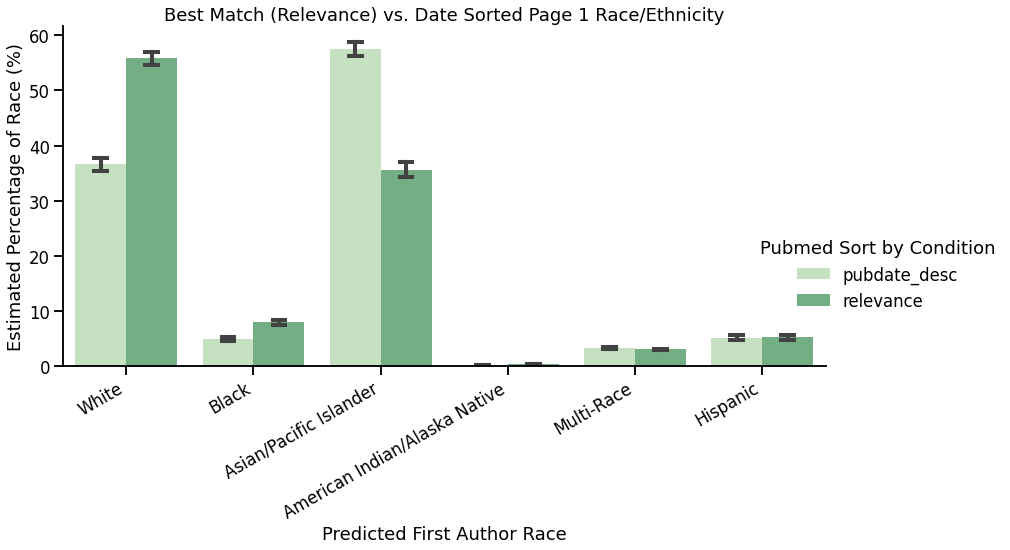

In [157]:
sns.set_context('talk')
g = sns.catplot(
    data=race_first_melt, kind="bar",
    x="author_race", y="percent_estimate", hue="search_type",
    ci=68, palette="Greens", hue_order=['pubdate_desc', 'relevance'], alpha=0.75, height=6, aspect = 2, capsize = 0.1
).set(title='Best Match (Relevance) vs. Date Sorted Page 1 Race/Ethnicity')
g.set_axis_labels("Predicted First Author Race", "Estimated Percentage of Race (%)")
g.legend.set_title("Pubmed Sort by Condition")
g.set_xticklabels(rotation=30, ha='right')
g.set_xticklabels(['White','Black','Asian/Pacific Islander','American Indian/Alaska Native','Multi-Race','Hispanic'])
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/first_author_race.png', dpi=300, bbox_inches='tight')

In [191]:
x = race_first_melt[race_first_melt['search_type'] == 'pubdate_desc']
y = race_first_melt[race_first_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'firstauthor_percent_white']['percent_estimate'].tolist()
b = y[y['author_race'] == 'firstauthor_percent_white']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.689719,2346.315423,two-sided,1.004904e-30,"[-22.54, -16.06]",0.482192,2.273e+27,1.0


In [195]:
x = race_first_melt[race_first_melt['search_type'] == 'pubdate_desc']
y = race_first_melt[race_first_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'firstauthor_percent_black']['percent_estimate'].tolist()
b = y[y['author_race'] == 'firstauthor_percent_black']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.223109,1719.859529,two-sided,1.973487e-07,"[-4.11, -1.87]",0.250837,3.653e+04,0.999442


In [196]:
x = race_first_melt[race_first_melt['search_type'] == 'pubdate_desc']
y = race_first_melt[race_first_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'firstauthor_percent_asian']['percent_estimate'].tolist()
b = y[y['author_race'] == 'firstauthor_percent_asian']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,11.60909,2047.469279,two-sided,3.202612e-30,"[18.19, 25.59]",0.509366,7.674e+26,1.0


In [197]:
x = race_first_melt[race_first_melt['search_type'] == 'pubdate_desc']
y = race_first_melt[race_first_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'firstauthor_percent_american_indian_alaskan_native']['percent_estimate'].tolist()
b = y[y['author_race'] == 'firstauthor_percent_american_indian_alaskan_native']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.094002,1030.493897,two-sided,0.002028,"[-0.29, -0.07]",0.149191,6.126,0.8749


In [198]:
x = race_first_melt[race_first_melt['search_type'] == 'pubdate_desc']
y = race_first_melt[race_first_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'firstauthor_percent_multi_race']['percent_estimate'].tolist()
b = y[y['author_race'] == 'firstauthor_percent_multi_race']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.365154,2181.277328,two-sided,0.172345,"[-0.1, 0.56]",0.058124,0.121,0.273809


In [199]:
x = race_first_melt[race_first_melt['search_type'] == 'pubdate_desc']
y = race_first_melt[race_first_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'firstauthor_percent_hispanic']['percent_estimate'].tolist()
b = y[y['author_race'] == 'firstauthor_percent_hispanic']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.095438,2098.130464,two-sided,0.923976,"[-1.41, 1.28]",0.004162,0.049,0.051042


# Race Best Match Pg 1 vs Pg 2

In [252]:
race_first_author = race[['query', 'search_type', 'page','firstauthor_percent_white', 'firstauthor_percent_black', 'firstauthor_percent_asian', 'firstauthor_percent_american_indian_alaskan_native', 'firstauthor_percent_multi_race', 'firstauthor_percent_hispanic']]


In [253]:
race_first_author_pbm = race_first_author[race_first_author['search_type'] == 'relevance']

In [254]:
race_first_author_pbm_melt = race_first_author_pbm.melt(id_vars=['query', 'search_type', 'page'], 
                                         var_name='author_race', value_name='percent_estimate')


In [255]:
race_first_author_pbm_melt = race_first_author_pbm_melt[race_first_author_pbm_melt.percent_estimate != '(S)']

In [242]:
numeric_list = pd.to_numeric(race_first_author_pbm_melt['percent_estimate'], errors = 'coerce')

In [243]:
race_first_author_pbm_melt['percent_estimate'] = numeric_list

In [249]:
race_first_author_pbm_melt = race_first_author_pbm_melt.dropna()

In [250]:
race_first_author_pbm_melt

,query,search_type,page,author_race,percent_estimate
0,Moyamoya,relevance,1,firstauthor_percent_white,73.35
1,Moyamoya,relevance,1,firstauthor_percent_white,45.27
2,Moyamoya,relevance,1,firstauthor_percent_white,2.60
4,Moyamoya,relevance,1,firstauthor_percent_white,23.01
8,Moyamoya,relevance,1,firstauthor_percent_white,1.83
...,...,...,...,...,...
21606,literacy skills,relevance,1,firstauthor_percent_hispanic,0.33
21607,literacy skills,relevance,1,firstauthor_percent_hispanic,0.75
21612,literacy skills,relevance,2,firstauthor_percent_hispanic,1.76
21616,literacy skills,relevance,2,firstauthor_percent_hispanic,1.36


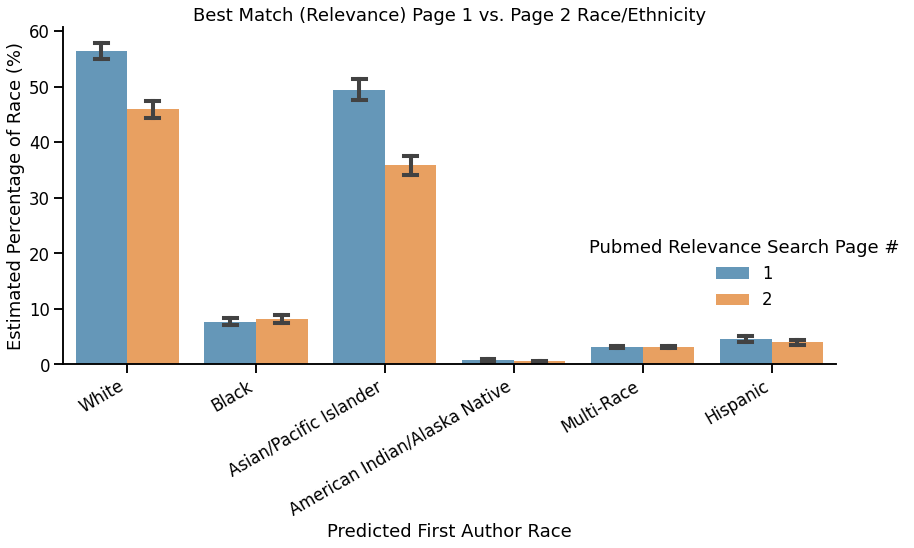

In [251]:
sns.set_context('talk')
g = sns.catplot(
    data=race_first_author_pbm_melt, kind="bar",
    x="author_race", y="percent_estimate", hue="page",
    ci=68, hue_order=[1,2], alpha=0.75, height=6, aspect = 2, capsize = 0.1
).set(title='Best Match (Relevance) Page 1 vs. Page 2 Race/Ethnicity')
g.set_axis_labels("Predicted First Author Race", "Estimated Percentage of Race (%)")
g.legend.set_title("Pubmed Relevance Search Page #")
g.set_xticklabels(rotation=30, ha='right')
g.set_xticklabels(['White','Black','Asian/Pacific Islander','American Indian/Alaska Native','Multi-Race','Hispanic'])
#plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/first_author_race_pbm_p1_vs_p2.png', dpi=300, bbox_inches='tight')

# Race Last Author

In [108]:
race_last_author = race[['query', 'search_type', 'page','lastauthor_percent_white', 'lastauthor_percent_black', 'lastauthor_percent_asian', 'lastauthor_percent_american_indian_alaskan_native', 'lastauthor_percent_multi_race', 'lastauthor_percent_hispanic']]


In [148]:
race_last_author = race_last_author[race_last_author['page'] == 1]

In [149]:
race_last_melt = race_last_author.melt(id_vars=['query', 'search_type', 'page'], 
                                         var_name='author_race', value_name='percent_estimate')


In [150]:
race_last_melt = race_last_melt[race_last_melt.percent_estimate != '(S)']
race_last_melt = race_last_melt.dropna()
numeric_list = pd.to_numeric(race_last_melt['percent_estimate'], errors = 'coerce')
race_last_melt['percent_estimate'] = numeric_list


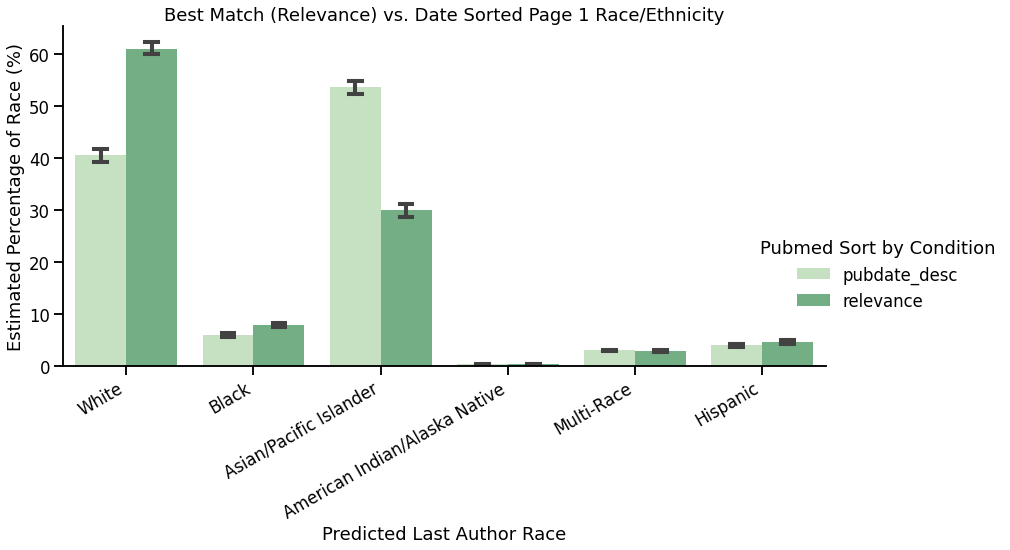

In [158]:
sns.set_context('talk')
g = sns.catplot(
    data=race_last_melt, kind="bar",
    x="author_race", y="percent_estimate", hue="search_type",
    ci=68, palette="Greens", hue_order=['pubdate_desc', 'relevance'], alpha=0.75, height=6, aspect = 2, capsize = 0.1
).set(title='Best Match (Relevance) vs. Date Sorted Page 1 Race/Ethnicity')
g.set_axis_labels("Predicted Last Author Race", "Estimated Percentage of Race (%)")
g.legend.set_title("Pubmed Sort by Condition")
g.set_xticklabels(rotation=30, ha='right')
g.set_xticklabels(['White','Black','Asian/Pacific Islander','American Indian/Alaska Native','Multi-Race','Hispanic'])
plt.savefig('/home/jupyter-brooks.leitner/pubmed-codeathon-team1/data/visualizations/last_author_race.png', dpi=300, bbox_inches='tight')

In [200]:
x = race_last_melt[race_last_melt['search_type'] == 'pubdate_desc']
y = race_last_melt[race_last_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'lastauthor_percent_white']['percent_estimate'].tolist()
b = y[y['author_race'] == 'lastauthor_percent_white']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-12.621959,2355.209669,two-sided,2.175470e-35,"[-23.69, -17.32]",0.518963,9.38e+31,1.0


In [201]:
x = race_last_melt[race_last_melt['search_type'] == 'pubdate_desc']
y = race_last_melt[race_last_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'lastauthor_percent_black']['percent_estimate'].tolist()
b = y[y['author_race'] == 'lastauthor_percent_black']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.314178,1767.634155,two-sided,0.000938,"[-3.02, -0.77]",0.156976,12.15,0.912029


In [202]:
x = race_last_melt[race_last_melt['search_type'] == 'pubdate_desc']
y = race_last_melt[race_last_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'lastauthor_percent_asian']['percent_estimate'].tolist()
b = y[y['author_race'] == 'lastauthor_percent_asian']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.726456,2088.967293,two-sided,8.665469e-36,"[20.01, 27.3]",0.555411,2.364e+32,1.0


In [203]:
x = race_last_melt[race_last_melt['search_type'] == 'pubdate_desc']
y = race_last_melt[race_last_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'lastauthor_percent_american_indian_alaskan_native']['percent_estimate'].tolist()
b = y[y['author_race'] == 'lastauthor_percent_american_indian_alaskan_native']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.473511,1242.894816,two-sided,0.140866,"[-0.26, 0.04]",0.072019,0.158,0.3235


In [204]:
x = race_last_melt[race_last_melt['search_type'] == 'pubdate_desc']
y = race_last_melt[race_last_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'lastauthor_percent_multi_race']['percent_estimate'].tolist()
b = y[y['author_race'] == 'lastauthor_percent_multi_race']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.185382,2175.865174,two-sided,0.235996,"[-0.12, 0.48]",0.050749,0.097,0.219603


In [205]:
x = race_last_melt[race_last_melt['search_type'] == 'pubdate_desc']
y = race_last_melt[race_last_melt['search_type'] == 'relevance']

#Comparing Page 1 Descending order publication date vs. Page 1 Best Match
a = x[x['author_race'] == 'lastauthor_percent_hispanic']['percent_estimate'].tolist()
b = y[y['author_race'] == 'lastauthor_percent_hispanic']['percent_estimate'].tolist()
ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.130355,2053.574445,two-sided,0.258459,"[-1.77, 0.47]",0.049648,0.093,0.204673
